# chapter 10: Evaluation of Learning Algorithms

# <center> ![picture](pictures/title.jpg)


While the majority of this book has delved into mining algorithms and constructing models, it is crucial to address the evaluation of these models. Although the maximum likelihood formalism offers consistency results in the limit of samples, real-world evaluation is based on a finite sample. Consider a scenario where two models, trained with different tuning parameters, are compared. Which model is "better," and what does that even mean? This chapter explores theoretical and empirical tools to comprehensively evaluate learning algorithms.

## 10.1 A Brief Introduction to Generalization Limits

Our objective throughout this book has been to derive a function that predicts outcomes with the least expected error across possible examples. However, the true expected error cannot be directly measured. Statistically, with a sufficient sample, we can approximate this expectation. Specifically, our goal is to choose a function from a function class $(\mathcal{H})$ to minimize a loss function $(\ell)$ in expectation over all pairs $((\mathbf{x}, \mathbf{y}))$:

$$[
\underset{f \in \mathcal{H}}{\text{min}} \ \mathbb{E}[\ell(f(\mathbf{X}), \mathbf{Y})]
]$$

For instance, in linear regression, $(\mathcal{H} = {f: \mathbb{R}^d \rightarrow \mathbb{R} \mid f(\mathbf{x}) = \mathbf{x}^T \mathbf{w}, \forall \mathbf{w} \in \mathbb{R}^d}.)$ Our goal is to minimize a proxy for the true expected error—the sample error:

$$[
\frac{1}{n}\sum_{i=1}^{n}\ell\left(f(\mathbf{x}_i), y_i\right)
]$$

The question arises: Does this sample error accurately estimate the true expected error, and what does it reveal about the actual generalization performance? We explore these questions through the lens of linear regression and delve into concentration inequalities and Rademacher complexity.

### 10.1.1 Concentration Inequalities

Concentration inequalities, exemplified by Hoeffding's inequality, provide bounds on the probability of deviations from the mean. For i.i.d. random variables $(X_1, ..., X_n)$ with $(0 \leq X_i \leq 1)$, the concentration of the sample mean $(\bar{X} = \frac{1}{n}\sum_{i=1}^{n}X_i)$ around the true mean is given by Hoeffding's inequality:

$$[
\Pr\left(\bar{X} - \mathbb{E}[\bar{X}] \geq \epsilon\right) \leq \exp(-2n\epsilon^2)
]$$

This yields a probability $(p = \exp(-2n\epsilon^2))$, and solving for $(\epsilon)$ leads to the bound $(\epsilon = \pm \sqrt{\frac{\ln(1/\delta)}{2n}})$. The Rademacher complexity is introduced as a measure of the ability of a function class to fit random noise.

### 10.1.2 Complexity of a Function Class

The Rademacher complexity of a function class reflects its ability to overfit in specific instances. It is defined as:

$$[
\hat{R}_n(\mathcal{H}) = \mathbb{E}\left[\underset{f \in \mathcal{H}}{\text{max}}\frac{1}{n}\sum_{i=1}^{n}\sigma_i f(\mathbf{x}_i)\right]
]$$

Here, $(\sigma_i)$ are i.i.d. random variables uniformly selected from $({-1, 1})$. Rademacher complexity offers insights into how a function class relates to random noise. It is further connected to the VC dimension, a measure of a function class's ability to separate points.

### 10.1.3 Generalization Bounds

Combining concentration inequalities and Rademacher complexity, we obtain a generalization bound:

$$[
\mathbb{E}[\ell(f(\mathbf{X}), \mathbf{Y})] \leq \frac{1}{n}\sum_{i=1}^{n}\ell(f(\mathbf{x}_i), y_i) + 2c \hat{R}_n(\mathcal{H}) + b\frac{\ln(1/\delta)}{2n}
]$$

This bound provides insights into the expected true error compared to the sample error, highlighting the impact of Rademacher complexity and concentration inequalities.

## 10.2 Comparison of Learning Algorithms

To empirically evaluate algorithms, comparisons are essential. One approach involves statistical significance tests, such as the binomial test. Suppose algorithms $(a_1)$ and $(a_2)$ are compared on $(m)$ independent datasets. A counting test, as shown in Table 10.1, provides a way to determine if one algorithm outperforms the other.

### 10.2.1 Binomial Test

For each dataset, both algorithms are evaluated, and a win/loss scenario is recorded. The null hypothesis $((H_0))$ assumes equal performance, while the alternative hypothesis $((H_1))$ asserts that $(a_1)$ is better than $(a_2)$. The binomial distribution is used to calculate the probability of $(k)$ wins or more under the null hypothesis, yielding a p-value. A significance threshold $(\alpha)$ determines whether there is sufficient evidence to reject $(H_0)$.

### 10.2.2 Paired t-Test

The paired t-test compares two algorithms using paired differences in errors, as shown in Table 10.2. This test assesses whether the mean difference is significantly different from zero. The significance level $(\alpha)$ guides the decision to reject the null hypothesis.

## 10.3 Obtaining Error Samples

Comparing algorithms requires valid performance measures. Unbiased error samples can be obtained through various methods, including holding test sets, k-fold cross-validation, and bootstrap resampling.

### 10.3.1 Holding Test Set

A held-out test set, untouched during training, provides unbiased error samples. Training two models on the training set yields pairs of error samples for statistical comparison.

### 10.3.2 Resampling Techniques

Resampling techniques, such as k-fold cross-validation and bootstrap resampling, offer alternative ways to obtain error estimates. These approaches ensure independence in error estimates and help gauge algorithm performance.

## 10.4 Performance Criteria for Classification Models

In classification, various performance measures reflect the relative importance of incorrect predictions for each class. Table 10.3 summarizes key terms used to discuss the performance of classification models.

### Conclusion

This chapter has introduced theoretical and empirical tools for evaluating learning algorithms. From concentration inequalities and Rademacher complexity to statistical significance tests and resampling techniques, a comprehensive understanding of these evaluation methods is crucial for practical machine learning applications. Further exploration and learning about these tools are encouraged to master the art of algorithm assessment.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

np.random.seed(42)
X = np.random.rand(100, 1)  # Feature
y = 3 * X.squeeze() + 2 + 0.1 * np.random.randn(100)  # Linear relationship with noise

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
average_mse = -np.mean(cv_scores)

print(f'Average MSE: {average_mse}')


Average MSE: 0.008534764258097832


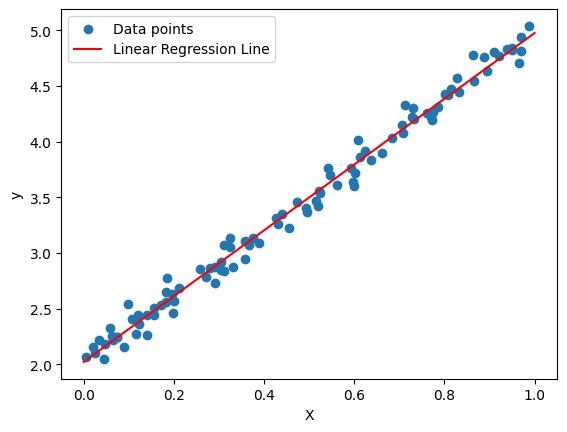

In [6]:
import matplotlib.pyplot as plt

model.fit(X, y)

plt.scatter(X, y, label='Data points')

x_range = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
